In [2]:
import cv2
# Load the multispectral and panchromatic images
coloured_image = cv2.imread("coloured.tif", cv2.IMREAD_UNCHANGED)
pan_image_16 = cv2.imread("PAN.tif", cv2.IMREAD_UNCHANGED)
pan_image = cv2.normalize(pan_image_16, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
# Check if the images were loaded successfully
if coloured_image is not None and pan_image is not None:
    print("Image Loaded Successfull")
else:
    print("Image loading failed. Please check the file paths and file formats.")

Image Loaded Successfull


In [3]:
import cv2

# Open the TIFF files with OpenCV
multispectral_image = cv2.imread("coloured.tif", cv2.IMREAD_UNCHANGED)
panchromatic_image = cv2.imread("PAN.tif", cv2.IMREAD_UNCHANGED)

# Check if the images were loaded successfully
if multispectral_image is not None and panchromatic_image is not None:
    # Display basic information about the images
    print("Multispectral Image Info:")
    print(f"Shape: {multispectral_image.shape}")
    print(f"Data Type: {multispectral_image.dtype}")
    print()

    print("Panchromatic Image Info:")
    print(f"Shape: {panchromatic_image.shape}")
    print(f"Data Type: {panchromatic_image.dtype}")

    # Close the images when you're done with them
else:
    print("Error: Unable to open one or both of the images.")

# Close the images when you're done with them
cv2.destroyAllWindows()


Multispectral Image Info:
Shape: (7820, 7931, 4)
Data Type: uint8

Panchromatic Image Info:
Shape: (20783, 21175)
Data Type: uint16


In [4]:
import cv2

# Load your multispectral image (MS) and panchromatic image (PAN)
multispectral_image = cv2.imread("coloured.tif", cv2.IMREAD_UNCHANGED)
panchromatic_image = cv2.imread("PAN.tif", cv2.IMREAD_UNCHANGED)

# Get the dimensions of both images
ms_height, ms_width = multispectral_image.shape[:2]
pan_height, pan_width = panchromatic_image.shape[:2]

# Calculate the scaling factors for resampling
scale_x = pan_width / ms_width
scale_y = pan_height / ms_height

# Perform resampling using the calculated scaling factors
resampled_ms_image = cv2.resize(multispectral_image, (pan_width, pan_height), interpolation=cv2.INTER_LINEAR)

# Now resampled_ms_image has the same spatial resolution as the panchromatic image

# Save the resampled multispectral image to a file
cv2.imwrite("resampled_multispectral.tif", resampled_ms_image)

True

In [5]:
import cv2

# Open the TIFF files with OpenCV
multispectral_image = cv2.imread("resampled_multispectral.tif", cv2.IMREAD_UNCHANGED)
panchromatic_image = cv2.imread("PAN.tif", cv2.IMREAD_UNCHANGED)

# Check if the images were loaded successfully
if multispectral_image is not None and panchromatic_image is not None:
    # Display basic information about the images
    print("Multispectral Image Info:")
    print(f"Shape: {multispectral_image.shape}")
    print(f"Data Type: {multispectral_image.dtype}")
    print()

    print("Panchromatic Image Info:")
    print(f"Shape: {panchromatic_image.shape}")
    print(f"Data Type: {panchromatic_image.dtype}")

    # Close the images when you're done with them
else:
    print("Error: Unable to open one or both of the images.")

# Close the images when you're done with them
cv2.destroyAllWindows()


Multispectral Image Info:
Shape: (20783, 21175, 4)
Data Type: uint8

Panchromatic Image Info:
Shape: (20783, 21175)
Data Type: uint16


In [6]:
import cv2
import numpy as np

def resize_image(image, new_width, new_height):
    return cv2.resize(image, (new_width, new_height))

def normalize_image(image):
    return cv2.normalize(image, None, 0, 1, cv2.NORM_MINMAX)

# Load the resampled multispectral image and panchromatic image
resampled_ms_image = cv2.imread("resampled_multispectral.tif", cv2.IMREAD_UNCHANGED)
panchromatic_image = cv2.imread("PAN.tif", cv2.IMREAD_UNCHANGED)

# Resize images to a smaller resolution
new_width, new_height = 1000, 1000  # Adjust these dimensions as needed
resampled_ms_image_resized = resize_image(resampled_ms_image, new_width, new_height)
panchromatic_image_resized = resize_image(panchromatic_image, new_width, new_height)

# Normalize the images
normalized_ms_image = normalize_image(resampled_ms_image_resized)
normalized_pan_image = normalize_image(panchromatic_image_resized)

# Save the normalized images if needed
cv2.imwrite("normalized_multispectral.tif", (normalized_ms_image * 255).astype('uint8'))
cv2.imwrite("normalized_panchromatic.tif", (normalized_pan_image * 255).astype('uint8'))



True

In [7]:
import cv2

# Load the multi-band TIFF image
multiband_image = cv2.imread("coloured.tif", cv2.IMREAD_UNCHANGED)


# Check if the image was loaded successfully
if multiband_image is not None:
    # Get the number of bands in the image
    num_bands = multiband_image.shape[2]

    # Split the multi-band image into individual bands
    bands = []
    for band_index in range(num_bands):
        band = multiband_image[:, :, band_index]
        bands.append(band)

    # Save each band as a separate image
    for band_index, band in enumerate(bands):
        band_filename = f"band{band_index + 1}.tif"
        cv2.imwrite(band_filename, band)

    print(f"Read {num_bands} bands from the multi-band image and saved them as separate TIFF files.")
else:
    print("Image loading failed. Please check the file path.")

Read 4 bands from the multi-band image and saved them as separate TIFF files.


In [8]:
import cv2

# Open the TIFF files with OpenCV
multispectral_image = cv2.imread("band1.tif", cv2.IMREAD_UNCHANGED)
panchromatic_image = cv2.imread("normalized_panchromatic.tif", cv2.IMREAD_UNCHANGED)

# Check if the images were loaded successfully
if multispectral_image is not None and panchromatic_image is not None:
    # Display basic information about the images
    print("Multispectral Image Info:")
    print(f"Shape: {multispectral_image.shape}")
    print(f"Data Type: {multispectral_image.dtype}")
    print()

    print("Panchromatic Image Info:")
    print(f"Shape: {panchromatic_image.shape}")
    print(f"Data Type: {panchromatic_image.dtype}")

    # Close the images when you're done with them
else:
    print("Error: Unable to open one or both of the images.")

# Close the images when you're done with them
cv2.destroyAllWindows()


Multispectral Image Info:
Shape: (7820, 7931)
Data Type: uint8

Panchromatic Image Info:
Shape: (1000, 1000)
Data Type: uint8


In [9]:
import cv2
import numpy as np
b1 = cv2.imread("band1.tif",cv2.IMREAD_UNCHANGED)
b2 = cv2.imread("band2.tif",cv2.IMREAD_UNCHANGED)
b3 = cv2.imread("band3.tif",cv2.IMREAD_UNCHANGED)
b4 = cv2.imread("band4.tif",cv2.IMREAD_UNCHANGED)
pan = cv2.imread("normalized_panchromatic.tif",cv2.IMREAD_UNCHANGED)
#metadata of the image
print('Landsat 8 -> band 1 shape:',b1.shape, '| Range (min, max): (', np.amin(b1), ',', np.amax(b1), ')')
print('Landsat 8 -> band 2 shape:',b2.shape, '| Range (min, max): (', np.amin(b2), ',', np.amax(b2), ')')
print('Landsat 8 -> band 3 shape:',b3.shape, '| Range (min, max): (', np.amin(b3), ',', np.amax(b3), ')')
print('Landsat 8 -> band 4 shape:',b4.shape, '| Range (min, max): (', np.amin(b4), ',', np.amax(b4), ')')
print('Landsat 8 -> panchromatic shape:',pan.shape, '| Range (min, max): (', np.amin(pan), ',', np.amax(pan), ')')

Landsat 8 -> band 1 shape: (7820, 7931) | Range (min, max): ( 0 , 255 )
Landsat 8 -> band 2 shape: (7820, 7931) | Range (min, max): ( 0 , 255 )
Landsat 8 -> band 3 shape: (7820, 7931) | Range (min, max): ( 0 , 255 )
Landsat 8 -> band 4 shape: (7820, 7931) | Range (min, max): ( 0 , 255 )
Landsat 8 -> panchromatic shape: (1000, 1000) | Range (min, max): ( 0 , 255 )


In [10]:
#Concatenate the bands of the multispectral image into a single numpy array\
import numpy as np
R = np.expand_dims(b2, axis=2)
G = np.expand_dims(b3, axis=2)
B = np.expand_dims(b4, axis=2)

img_xs = np.concatenate((R,G), axis=2)
img_xs = np.concatenate((img_xs,B), axis=2)
print('Multiespectral image shape:', img_xs.shape)
print(pan.shape)

Multiespectral image shape: (7820, 7931, 3)
(1000, 1000)


Image Visualization: We have to normalize them to the range 0-255, in order to displpay them in the RGB colour space

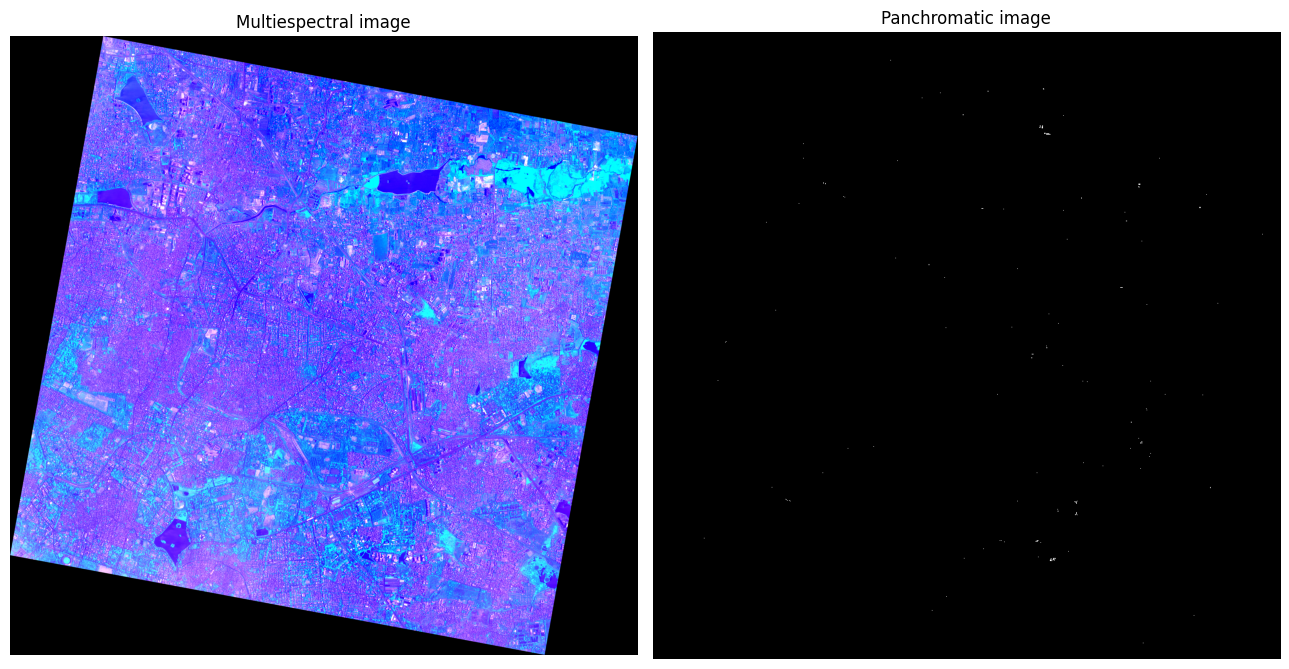

In [11]:
import numpy as np
import matplotlib.pyplot as plt


# Multispectral image normalization
R = (((R-np.amin(R))/(np.amax(R)-np.amin(R)))*255).astype(int)
G = (((G-np.amin(G))/(np.amax(G)-np.amin(G)))*255).astype(int)
B = (((B-np.amin(B))/(np.amax(B)-np.amin(B)))*255).astype(int)
xs = np.concatenate((R,G), axis=2)
xs = np.concatenate((xs,B), axis=2)

# panchromatic image normalization
pan = (((pan-np.amin(pan))/(np.amax(pan)-np.amin(pan)))*255).astype(int)

# Container creation, to fit the plots
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(13, 10))

# Add the multiespectral image to the container
ax0.imshow(xs)
ax0.set_title("Multiespectral image")
ax0.axis('off')

# Add the panchromatic image to the container
ax1.imshow(pan, 'gray')
ax1.set_title("Panchromatic image")
ax1.axis('off')

plt.tight_layout()

In [12]:
# Base filter used to degardate the images
base_filter = 1/256 * np.array([[1, 4, 6, 4 ,1],
[4, 16, 24, 16, 4],
[6, 24, 36, 24, 6],
[4, 16, 24, 16, 4],
[1, 4, 6, 4 ,1]])

# This function adds n zeros between each element opf the array
def put_n_zeros(row, n):
    result = [row[0]]
    for i in range(1,len(row)):
        result += [0]*n + [row[i]]
    return result

# This method adds n rows of zeros between each element of the matrix
def put_n_rows_of_zeros(matrix, n):
    zeros = np.zeros((n,len(matrix[0])))
    result = [matrix[0]]
    for i in range(1,len(matrix)):
        result = np.concatenate((result, zeros, [matrix[i]]))
    return result

def obtain_filter(n=0,base_filter=base_filter):
    filter = []
    for row in base_filter:
        filter.append(put_n_zeros(row, n))
    return put_n_rows_of_zeros(filter,n)

In [13]:
import dask.array as da
import numpy as np
from scipy.signal import fftconvolve
from skimage.filters.rank import entropy
from skimage.morphology import disk
import time  # Add this import

def twa(xs, levels):
    degradation = np.zeros_like(xs, dtype=float)  # Ensure degradation has dtype float64
    current_degradation = xs
    a_trous_filter = obtain_filter(levels)
    for _ in range(levels):
        previous_degradation = current_degradation
        current_degradation = fftconvolve(current_degradation, a_trous_filter, mode='same', axes=(0, 1))

        # Debugging: Print data types
        print("Data Types - degradation:", degradation.dtype, "current_degradation:", current_degradation.dtype)

        degradation = degradation.astype(current_degradation.dtype)  # Cast degradation to match current_degradation
        degradation += current_degradation
    return degradation, current_degradation


import traceback

@da.as_gufunc(signature="(i,j,k),(i,j)->(i,j)")
def fusion_twa_single_band_dask(xs, pan, levels, init_level=0):
    try:
        print(f"Processing band with shape {xs.shape}")
        _, f_xs = twa(xs, levels)
        print(f"Completed wavelet transform for the multispectral band")

        c_pan, _ = twa(pan, levels)
        print(f"Completed wavelet transform for the panchromatic band")

        coef_pan = np.sum(c_pan, axis=2)

        print(f"Shapes: f_xs={f_xs.shape}, apply_entropy(xs)={apply_entropy(xs).shape}, coef_pan={coef_pan.shape}")

        f_xs_dask = da.from_array(f_xs, chunks=(100, 100))  # Adjust chunk size accordingly
        coef_pan_dask = da.from_array(coef_pan, chunks=(100, 100))

        entropy_xs = apply_entropy(xs)  # Compute entropy once
        print(f"Shape of entropy_xs={entropy_xs.shape}")

        fused_band_dask = f_xs_dask + applyEntropy(xs, radius).astype(np.float64) * coef_pan_dask.astype(np.float64)

        print("Successfully computed fused band")

        return fused_band_dask.compute()
    except Exception as e:
        print(f"Error in fusion_twa_single_band_dask: {e}")
        traceback.print_exc()
        return None

@da.as_gufunc(signature="(i,j),(i,j),()->(i,j)", output_dtypes=(np.float32, 1))
def fusion_twa_multiband_dask(xs, pan, levels, init_level=0, chunk_size=500):
    try:
        s_time = time.time()
        fused_bands = []

        if pan.ndim > 2:
            pan = pan[:, :, 0]

        if xs.ndim > 2:
            num_bands = xs.shape[2]
            for nBand in range(0, num_bands, chunk_size):
                print("---------------------------------------------------")
                print(f"Fusing bands {nBand} to {min(nBand + chunk_size, num_bands)} of the multispectral image")

                chunk_xs = xs[:, :, nBand:min(nBand + chunk_size, num_bands)]
                chunk_fused_band = da.map_blocks(
                    fusion_twa_single_band_dask,
                    chunk_xs,
                    pan,
                    levels,
                    meta=np.array([]),
                    init_level=init_level
                )
                fused_bands.append(chunk_fused_band)

                print(f"Fused bands {nBand} to {min(nBand + chunk_size, num_bands)} of the multispectral image")
                print(f"---- {time.time() - s_time} seconds ------")
                print("---------------------------------------------------")

            # Stack the computed bands along the third axis
            fused_img = da.concatenate(fused_bands, axis=2)
            return fused_img.compute()

        else:
            print(f"The first argument must have the shape (x, y, z), received: {xs.shape}")
            return None
    except Exception as e:
        print(f"Error in fusion_twa_multiband_dask: {e}")
        traceback.print_exc()
        return None



def apply_entropy(xs):
    radius = 1  # Define radius or use a variable that is defined
    img = entropy(xs, disk(radius))
    img = img / np.amax(img)
    return img.astype(np.float32)


The original wavelet a trous algorithm strategy does not consider spectral differences between bands and cannot control the inherent trade-off between spatial-spectral quality in the fused image. Lillo-Saavedra and Gonzalo proposed a modification of the à trous algorithm, establishing a mechanism that controls this trade-off by introducing a wavelet coefficient weighting factor ( αi ) for the panchromatic wavelet coefficients. 

In [14]:
def fusion_wtwa_multiband(xs, pan, alpha, levels, init_level=0):
    s_time = time.time()
    
    # If we receive a int instead of a vector of n-bands weights, we apply the same weight to each band
    if isinstance(alpha, (float, int)):
        alpha = [alpha] * xs.shape[2]
    
    # Initialize a list to collect fused bands
    fused_bands = []
    
    # If the panchromatic image has more than one band, we use the first
    if pan.ndim > 2:
        pan = pan[:, :, 0]
    
    # If the multispectral image has 3 bands or more, we start the fusion
    if xs.ndim > 2:
        for nBand in range(xs.shape[2]):
            print("---------------------------------------------------")
            print(f"Fusing band {nBand} of the multispectral image")
            
            img_nBand = fusion_wtwa_single_band(xs[:, :, nBand], pan, alpha[nBand], levels)
            fused_bands.append(img_nBand)
            
            print(f"Fused band {nBand} of the multispectral image")
            print(f"---- {time.time() - s_time} seconds ------")
            print("---------------------------------------------------")
        
        # Concatenate the list of fused bands along the third axis
        fused_img = np.concatenate(fused_bands, axis=-1)
        return fused_img
    
    else:
        print(f"The first argument must have the shape (x, y, z), received: {xs.shape}")
        return None

def fusion_wtwa_single_band(xs, pan, alpha, levels, init_level=0):
    # Apply wavelet a trous to both bands, obtain the degraded band of the multispectral band,
    # and the wavelet coefficients of the panchromatic image
    _, f_xs = twa(xs, levels)
    c_pan, _ = twa(pan, levels)
    
    # Add the coefficients
    coef_pan = np.sum(c_pan, axis=2)
    
    # Obtain the fused band
    print(f"Fusing the band of the multispectral image giving {alpha} to the weight of the spatial resolution")
    fused_band = f_xs + alpha * coef_pan
    return fused_band


Despite the previously mentioned advantage of the weighted wavelet à trous fusion algorithm, the method is not capable of discriminating between different land covers present in images. In that sense, the same value of  αi  is used to weigh the information coming from the panchromatic wavelet coefficients for each spectral band. This is the main cause of the artifacts in the fused images. To overcome this problem, (M. Lillo et al., 2011) proposed a new version of this algorithm.

In [15]:
from dask import delayed
import dask.array as da
import numpy as np
from scipy.signal import fftconvolve
from skimage.measure import shannon_entropy
import cv2
import time
from scipy.ndimage import gaussian_filter
@delayed
def fusion_ftwa_single_band_dask(xs, pan, radius, levels, degradation_mask=None, init_level=0):
    # ... (previous code)

    # If degradation_mask is None, compute it within the function
    if degradation_mask is None:
        degradation_mask = compute_degradation_mask(xs, pan, radius, levels)

    # Create a degradation mask using the a trous transform
    degradation_mask_twa, _ = twa(degradation_mask, levels)
    a_trous_filter_twa = obtain_filter(levels)

    # Convolve the mask with the filter
    current_degradation = fftconvolve(degradation_mask_twa, a_trous_filter_twa, mode='same', axes=(0, 1))

    # Cast current_degradation to the same dtype as xs
    current_degradation = current_degradation.astype(xs.dtype)

    # Update the degradation, ensuring it's initialized with the correct dtype
    degradation = current_degradation.copy()

    return degradation, current_degradation

# ... (rest of the code)


# ... (rest of the code)

def compute_degradation_mask(xs, pan, radius, levels):
    # Convert the panchromatic image to float for the convolution
    pan_float = pan.astype(float)

    # Apply a Gaussian filter to the panchromatic image
    gaussian_smoothed = gaussian_filter(pan_float, sigma=radius)

    # Calculate the degradation mask by subtracting the smoothed panchromatic image
    # from the original panchromatic image
    degradation_mask = pan_float - gaussian_smoothed

    # Clip negative values to zero
    degradation_mask[degradation_mask < 0] = 0

    # Normalize the degradation mask to [0, 1]
    degradation_mask /= np.max(degradation_mask)

    # Scale the degradation mask to the desired number of levels
    degradation_mask *= levels

    # Round the values to integers
    degradation_mask = np.round(degradation_mask).astype(np.uint8)

    return degradation_mask

def fusion_ftwa_multiband_dask(xs, pan, radius, levels, init_level=0, chunk_size=200):
    s_time = time.time()
    fused_bands = []

    if pan.ndim > 2:
        pan = pan[:, :, 0]

    if xs.ndim > 2:
        dask_arrays = []
        for nBand, band in enumerate(xs.transpose(2, 0, 1)):
            print("---------------------------------------------------")
            print(f"Fusing band {nBand} of the multispectral image")

            # Pass degradation_mask as an argument
            img_nBand = delayed(fusion_ftwa_single_band_dask)(band, pan, radius, levels, init_level=init_level)
            dask_arrays.append(img_nBand)

            print(f"Fused band {nBand} of the multispectral image")
            print(f"---- {time.time() - s_time} seconds ------")
            print("---------------------------------------------------")

        # Compute the dask arrays with reduced chunk size
        fused_bands = da.compute(*dask_arrays, scheduler='single-threaded', num_workers=1, chunks=(chunk_size, chunk_size))

        # Separate bands and degradations
        fused_img_bands = [band[0] for band in fused_bands]
        fused_degradations = [band[1] for band in fused_bands]

        # Ensure consistent data type during the fusion
        fused_img = np.stack(fused_img_bands, axis=2)

        # Sum the degradations along the third axis
        total_degradation = np.sum(fused_degradations, axis=0)

        # Add the total_degradation to each band in fused_img
        for i in range(fused_img.shape[2]):
            fused_img[:, :, i] += total_degradation

        # Ensure consistent data type after the addition
        fused_img = fused_img.astype(xs.dtype)

        return fused_img

    else:
        print(f"The first argument must have the shape (x, y, z), received: {xs.shape}")
        return None

# ... (other code)

# Ensure consistent data type during the fusion
img_fus = fusion_ftwa_multiband_dask(img_xs, pan, 10, 5, chunk_size=1000)
img_fus = img_fus.astype(np.uint64)

---------------------------------------------------
Fusing band 0 of the multispectral image
Fused band 0 of the multispectral image
---- 0.0009989738464355469 seconds ------
---------------------------------------------------
---------------------------------------------------
Fusing band 1 of the multispectral image
Fused band 1 of the multispectral image
---- 0.0009989738464355469 seconds ------
---------------------------------------------------
---------------------------------------------------
Fusing band 2 of the multispectral image
Fused band 2 of the multispectral image
---- 0.0020041465759277344 seconds ------
---------------------------------------------------
Data Types - degradation: float64 current_degradation: float64
Data Types - degradation: float64 current_degradation: float64
Data Types - degradation: float64 current_degradation: float64
Data Types - degradation: float64 current_degradation: float64
Data Types - degradation: float64 current_degradation: float64
Data

PANSHARPENING

Normalization of the fused image to the multispectral image values

In [16]:
def normalize_band(img_fus_band, img_xs_band):
    # Avoid division by zero
    img_fus_min = np.amin(img_fus_band)
    img_fus_max = np.amax(img_fus_band)
    img_xs_min = np.amin(img_xs_band)
    img_xs_max = np.amax(img_xs_band)

    if img_fus_max - img_fus_min == 0 or img_xs_max - img_xs_min == 0:
        return img_fus_band

    # Perform normalization
    normalized_band = (
        (img_fus_band - img_fus_min) / (img_fus_max - img_fus_min)
    ) * img_xs_max + ((img_fus_max - img_fus_band) / (img_fus_max - img_fus_min)) * img_xs_min

    return normalized_band


# Apply normalization to each band
for band_idx in range(img_fus.shape[2]):
    img_fus[:, :, band_idx] = normalize_band(img_fus[:, :, band_idx], img_xs[:, :, band_idx])

print('Completed normalization to the multispectral image values')

Completed normalization to the multispectral image values


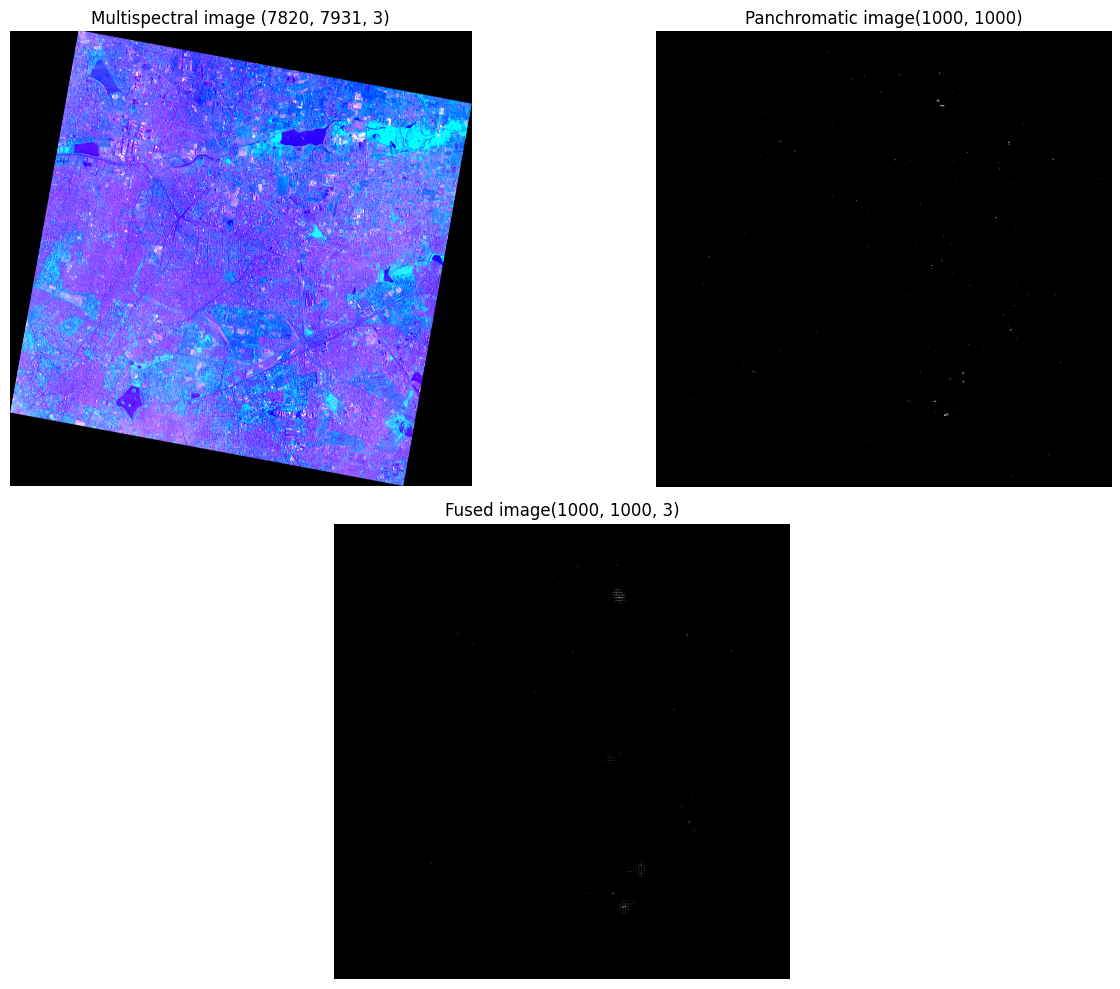

In [17]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np



# Fused image normalization - Nomalizing them to the range 0-255, in order to display them in RGB
vis_fus = np.copy(img_fus)
vis_fus[:,:,0] = ((vis_fus[:,:,0]-np.amin(vis_fus[:,:,0]))/(np.amax(vis_fus[:,:,0])-np.amin(vis_fus[:,:,0])))*255
vis_fus[:,:,1] = ((vis_fus[:,:,1]-np.amin(vis_fus[:,:,1]))/(np.amax(vis_fus[:,:,1])-np.amin(vis_fus[:,:,1])))*255
vis_fus[:,:,2] = ((vis_fus[:,:,2]-np.amin(vis_fus[:,:,2]))/(np.amax(vis_fus[:,:,2])-np.amin(vis_fus[:,:,2])))*255
vis_fus = vis_fus.astype(int)
# vis_fus_normalized = vis_fus.astype(np.float32) / 255.0 
# Saving the images
plt.imsave('multispectral_image.png', xs.astype(np.uint8))
plt.imsave('panchromatic_image.png', pan.astype(np.uint8), cmap='gray')
plt.imsave('fused_image.png', vis_fus.astype(np.uint8))

# Container creation, to fit the plots, with gridspec layout from matplotlib
fig = plt.figure(figsize=(13, 10))
spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

# Add the multispectral image
ax0 = fig.add_subplot(spec[0,0])
ax0.imshow(xs)
ax0.set_title("Multispectral image " + str(img_xs.shape))
ax0.axis('off')

# Add the panchromatic image
ax1 = fig.add_subplot(spec[0,1])
ax1.imshow(pan, 'gray')
ax1.set_title("Panchromatic image"  + str(pan.shape))
ax1.axis('off')

# Add the fused image
ax2 = fig.add_subplot(spec[1,:])
ax2.imshow(vis_fus)
ax2.set_title("Fused image" + str(img_fus.shape))
ax2.axis('off')

plt.tight_layout()